### Heart Disease Prediction using Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv('heart_v2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [3]:
df.head()


,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [5]:
df.shape

(270, 5)

In [6]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [7]:
X = df.drop('heart disease', axis=1)
y = df['heart disease'].copy()

In [8]:
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, train_size=0.70)

In [11]:
X_train.head()

,age,sex,BP,cholestrol
101,67,1,120,237
177,46,1,150,231
221,65,1,135,254
253,51,1,110,175
113,54,0,135,304


In [12]:
X_train.shape

(189, 4)

In [13]:
X_test.shape

(81, 4)

In [14]:
y_train.head()

101    1
177    1
221    1
253    0
113    0
Name: heart disease, dtype: int64

In [15]:
y_train.shape

(189,)

In [16]:
y_test.shape

(81,)

### Building Decision Tree

#### Use all defaullt parameters except depth

In [17]:
dt = DecisionTreeClassifier(max_depth=3)

In [18]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [19]:
from IPython.display import Image
#from sklearn.externals.six import StringIO
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [20]:
dot_data = StringIO()

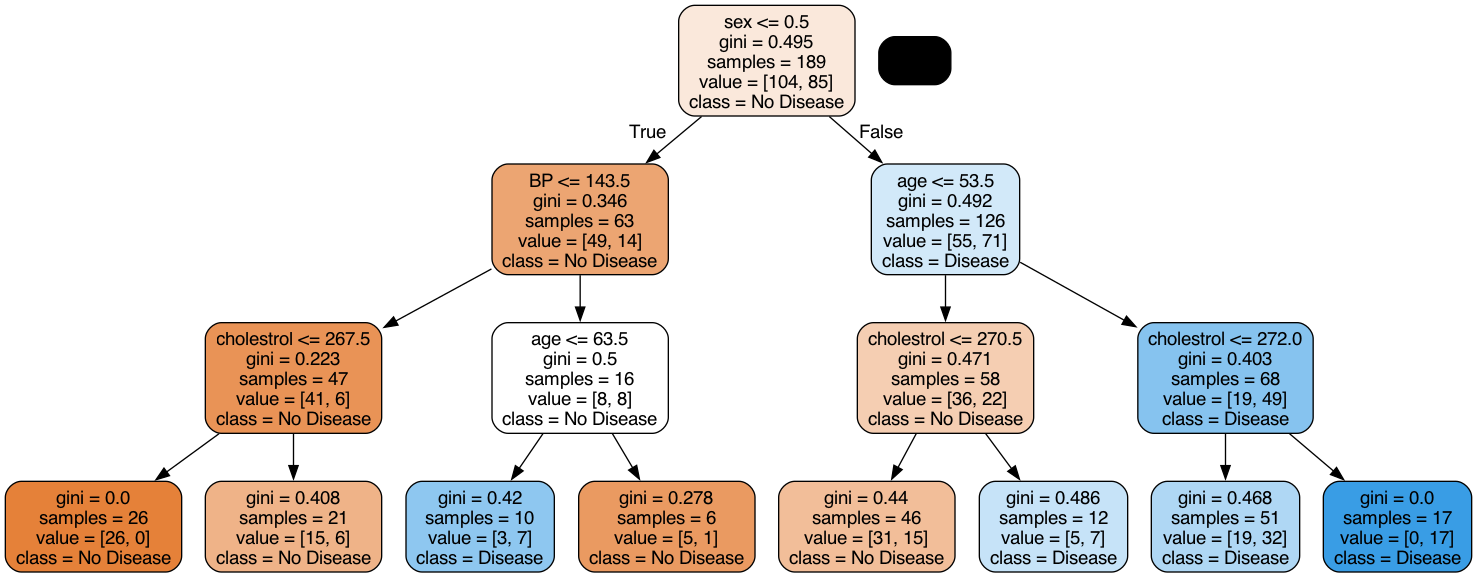

In [21]:
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
               feature_names=X.columns, class_names=['No Disease', 'Disease'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Evaluating the models on test data

In [22]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
print(accuracy_score(y_pred=y_train_pred, y_true=y_train))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[77, 27],
       [22, 63]])

In [25]:
print(accuracy_score(y_pred=y_test_pred, y_true=y_test))
confusion_matrix(y_test, y_test_pred)

0.6790123456790124


array([[31, 15],
       [11, 24]])

### Create helper functions to create evaluate the graph and create DT

In [26]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
               feature_names=X.columns, class_names=['No Disease', 'Disease'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph
    


In [27]:
def evaluate_model(dt_classifier):
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    print(accuracy_score(y_pred=y_train_pred, y_true=y_train))
    print(confusion_matrix(y_train, y_train_pred))
    print('-'*50)
    print(accuracy_score(y_pred=y_test_pred, y_true=y_test))
    print(confusion_matrix(y_test, y_test_pred))

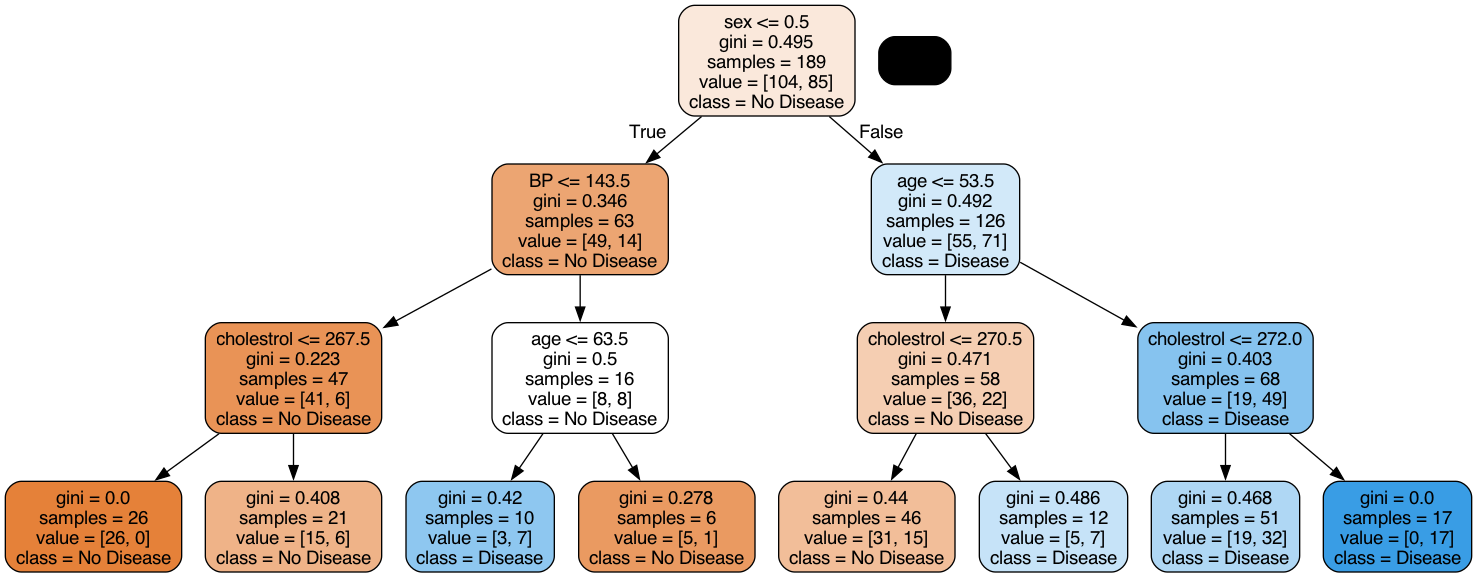

In [28]:
gph = get_dt_graph(dt)
Image(gph.create_png())

### Making decision Tree with default setting

In [29]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

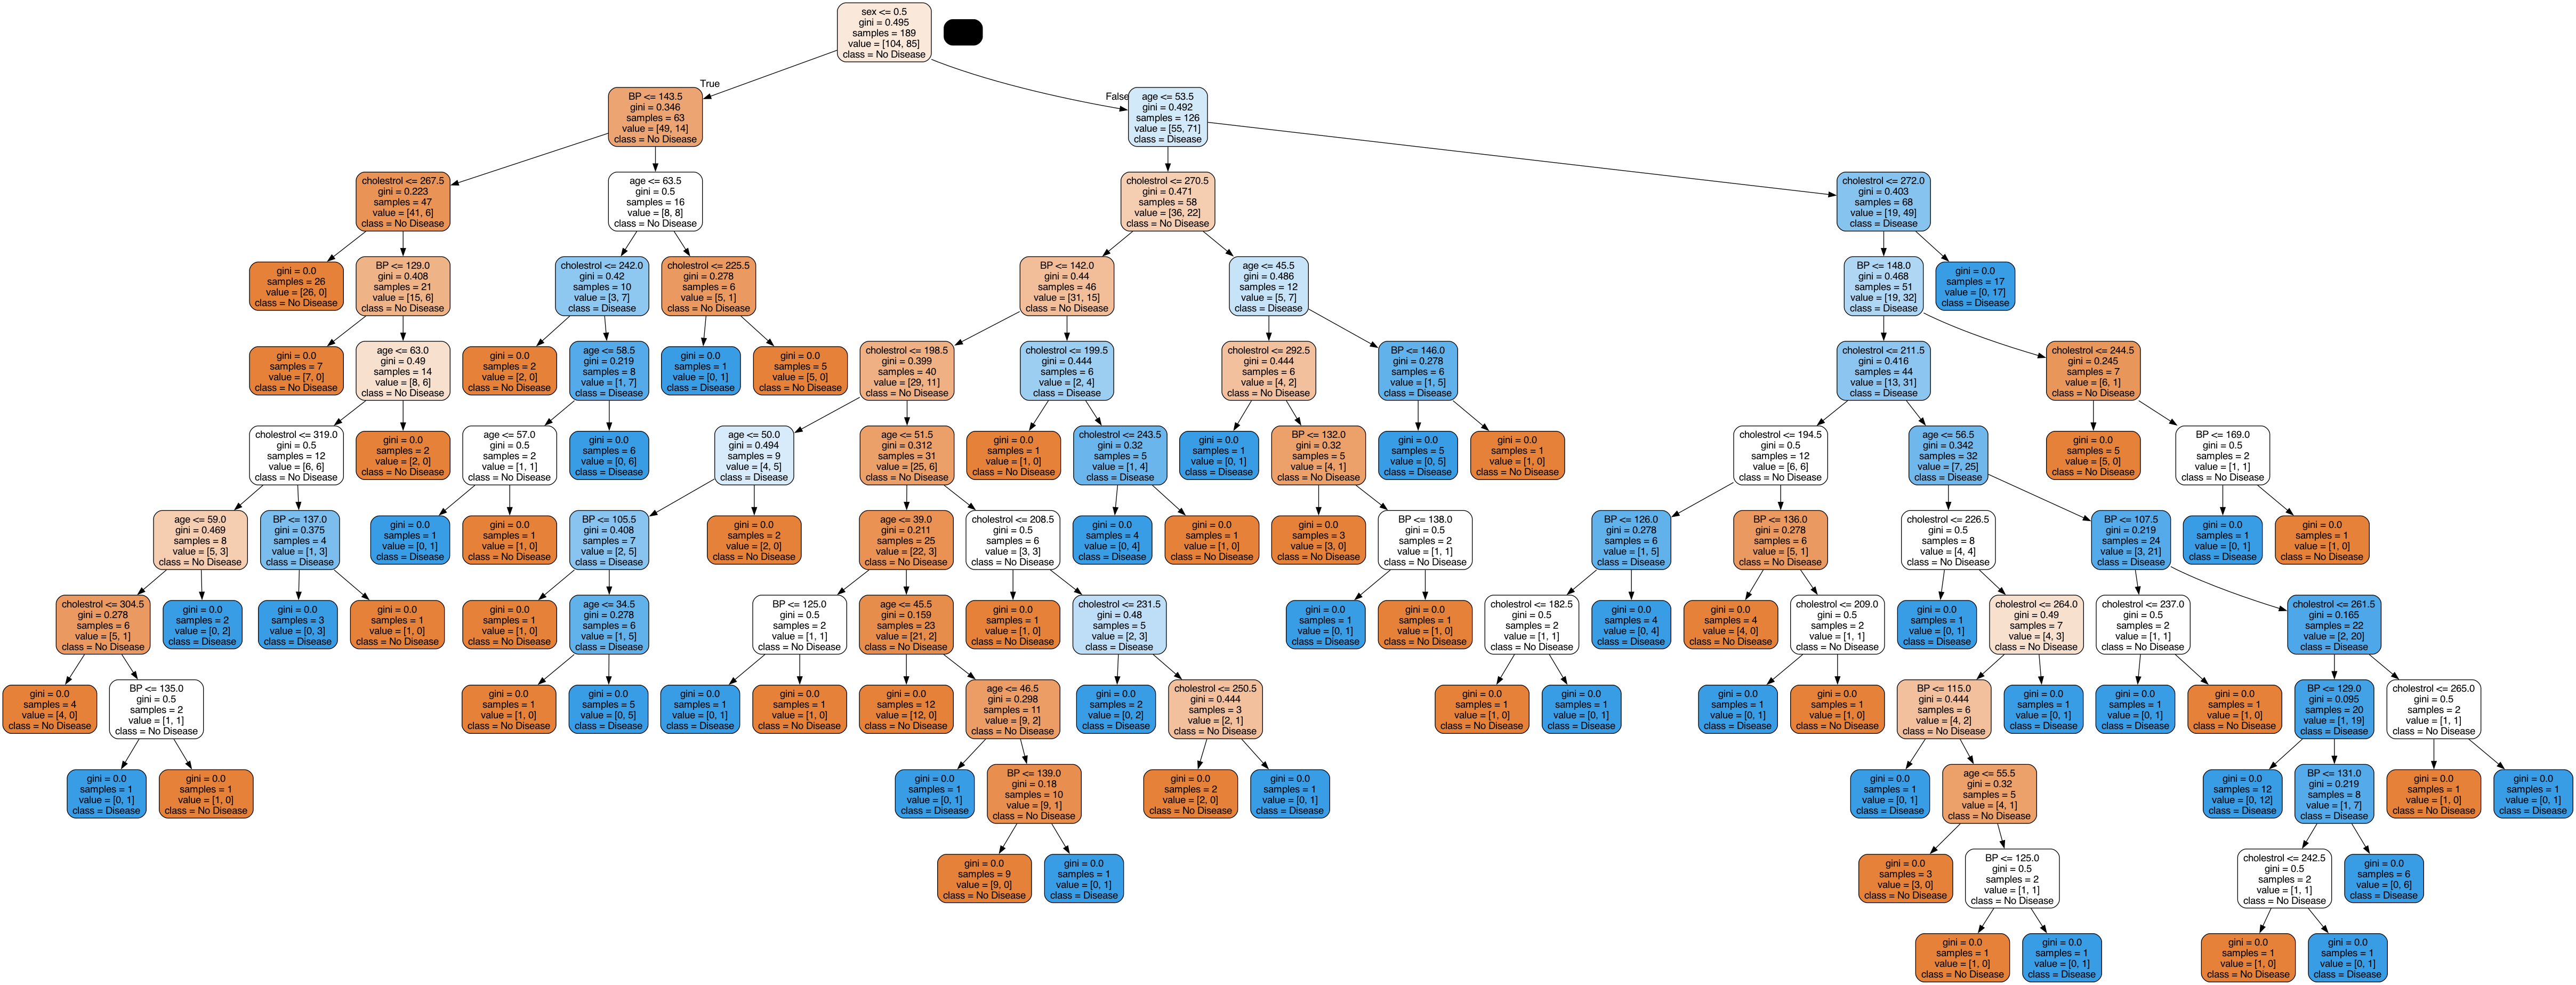

In [30]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [31]:
evaluate_model(dt_default)

1.0
[[104   0]
 [  0  85]]
--------------------------------------------------
0.6419753086419753
[[30 16]
 [13 22]]


### Decision tree with depth 3

In [32]:
dt_max_depth = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_max_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

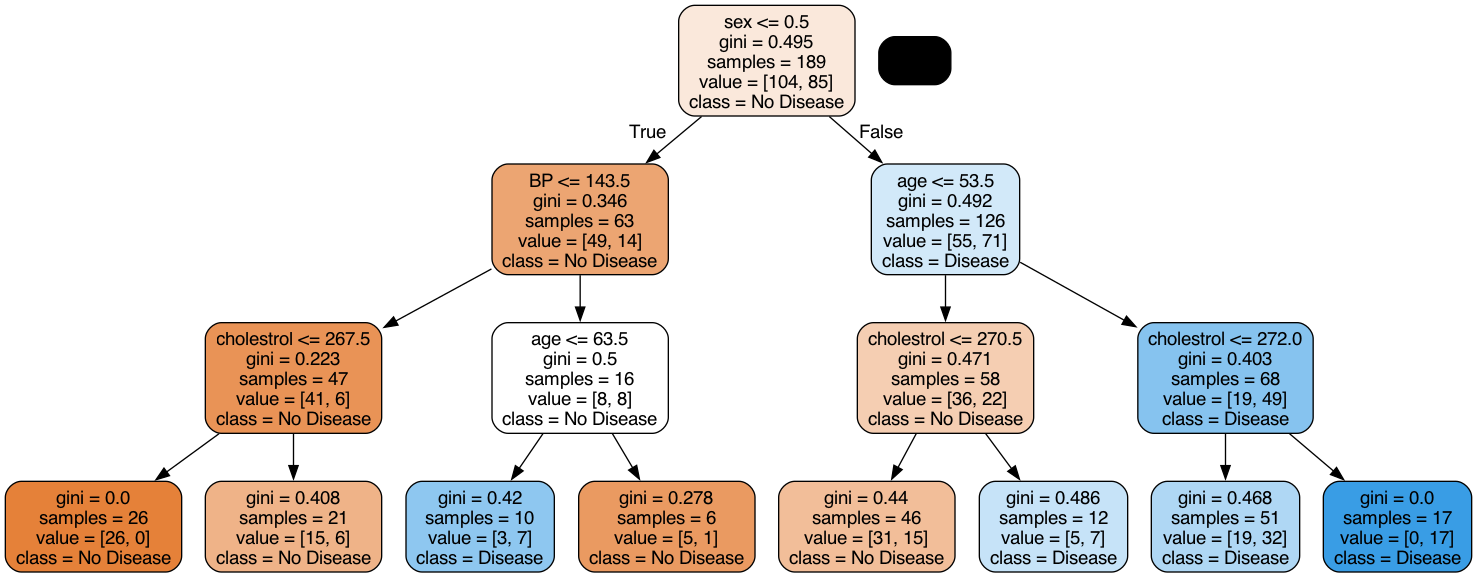

In [33]:
gph = get_dt_graph(dt_max_depth)
Image(gph.create_png())

In [34]:
evaluate_model(dt_max_depth)

0.7407407407407407
[[77 27]
 [22 63]]
--------------------------------------------------
0.6790123456790124
[[31 15]
 [11 24]]


### Decision Tree specifying mininum samples before split

In [35]:
dt_min_split = DecisionTreeClassifier(random_state=42, min_samples_split=20)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

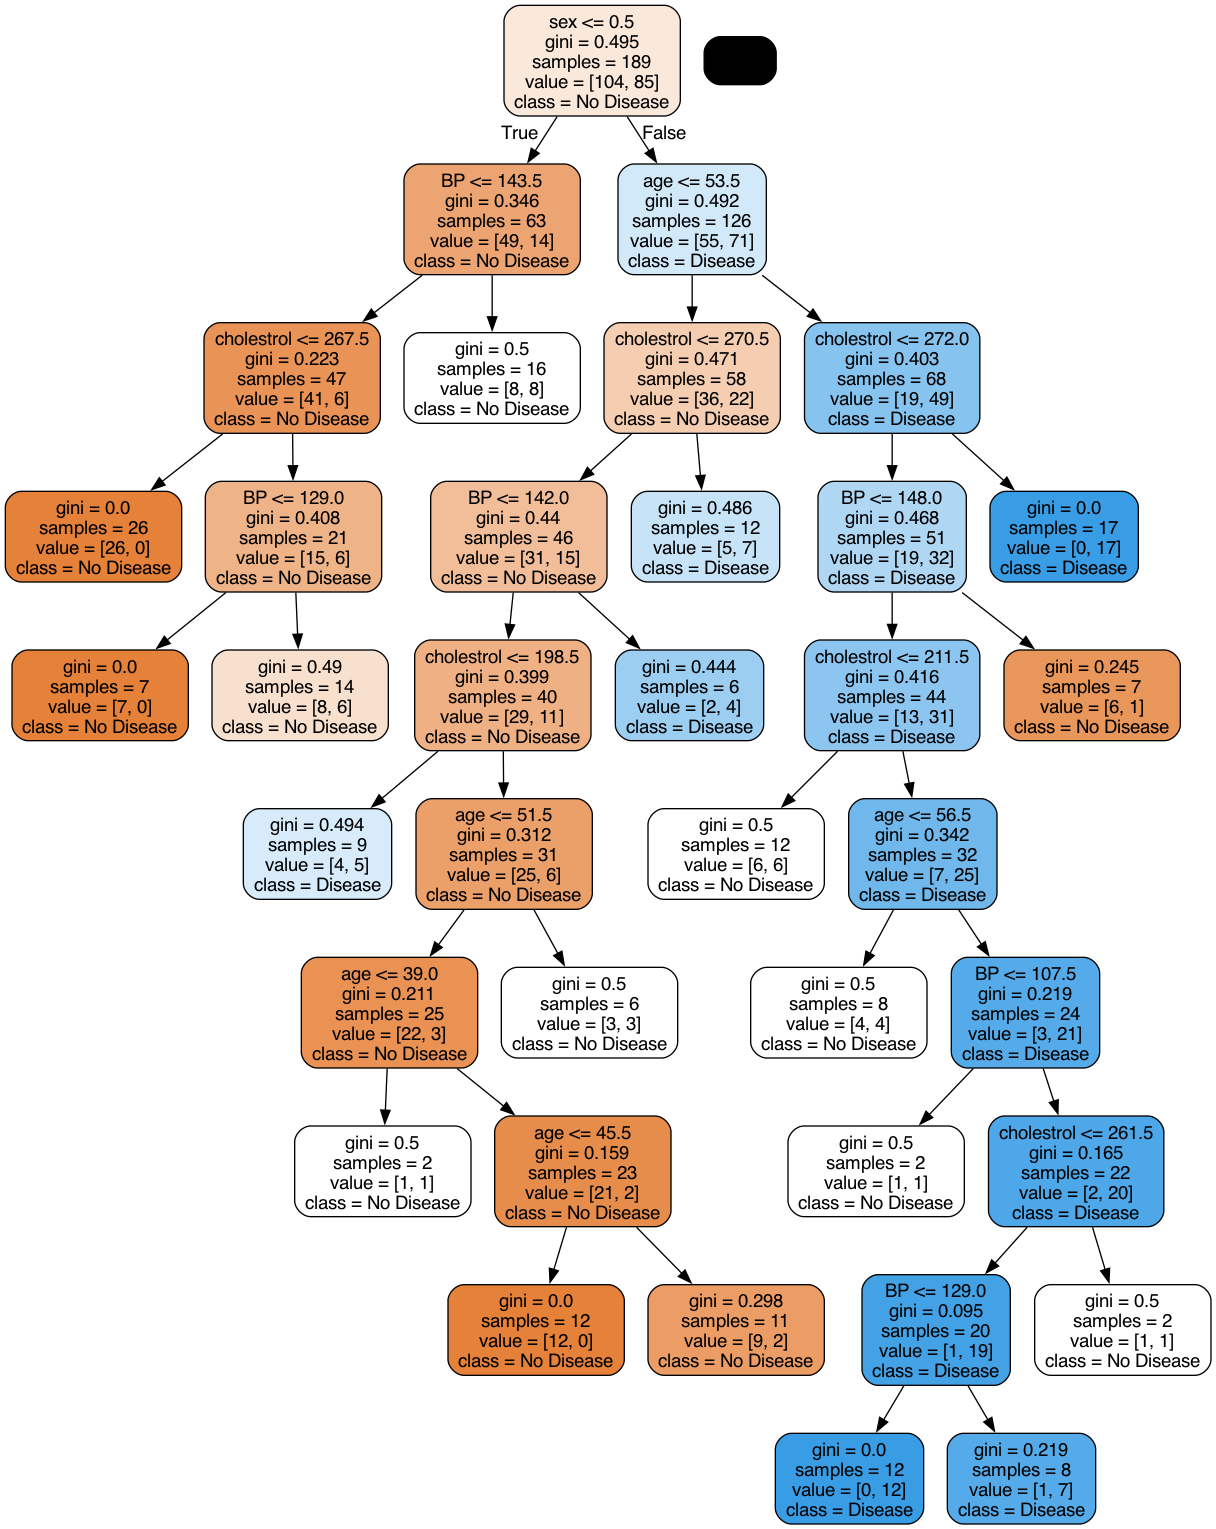

In [36]:
gph= get_dt_graph(dt_min_split)
Image(gph.create_png())

In [37]:
evaluate_model(dt_min_split)

0.7619047619047619
[[92 12]
 [33 52]]
--------------------------------------------------
0.6296296296296297
[[33 13]
 [17 18]]


### Specifying mininmum number of samples in leaf node



In [38]:
dt_min_leaf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

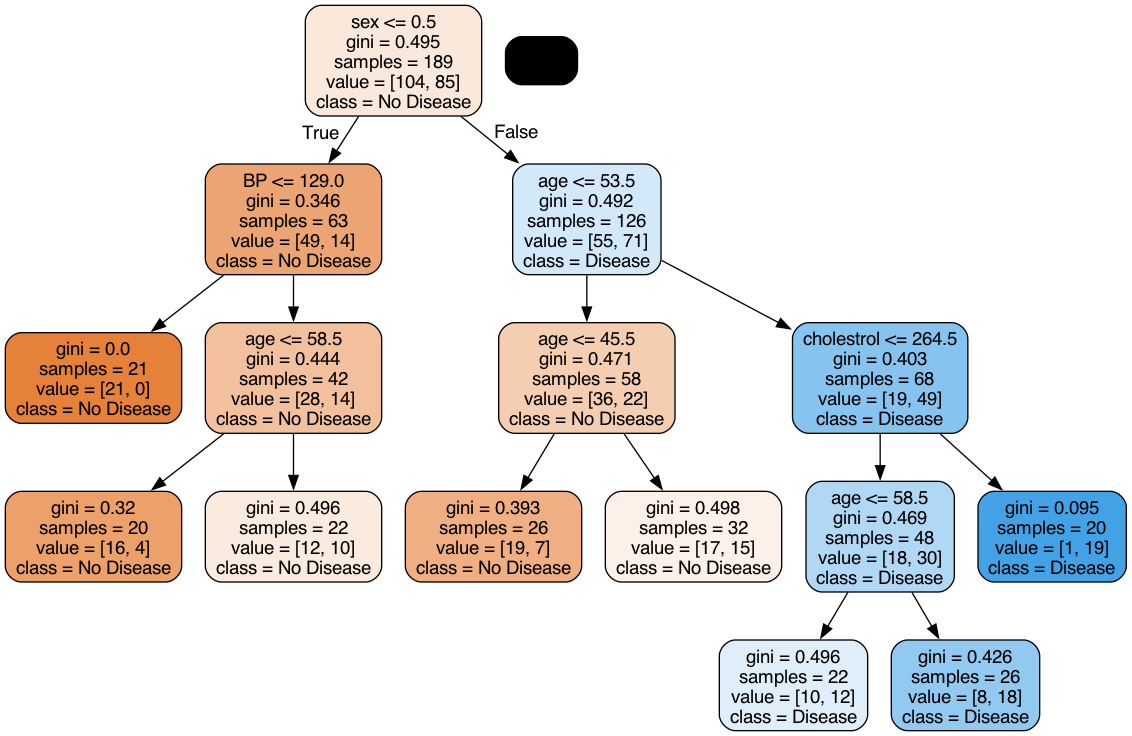

In [39]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [40]:
evaluate_model(dt_min_leaf)

0.708994708994709
[[85 19]
 [36 49]]
--------------------------------------------------
0.6419753086419753
[[33 13]
 [16 19]]


### Using Entropy instead of Gini

In [41]:
dt_min_leaf_entropy = DecisionTreeClassifier(random_state=42, min_samples_leaf=20, criterion='entropy')
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

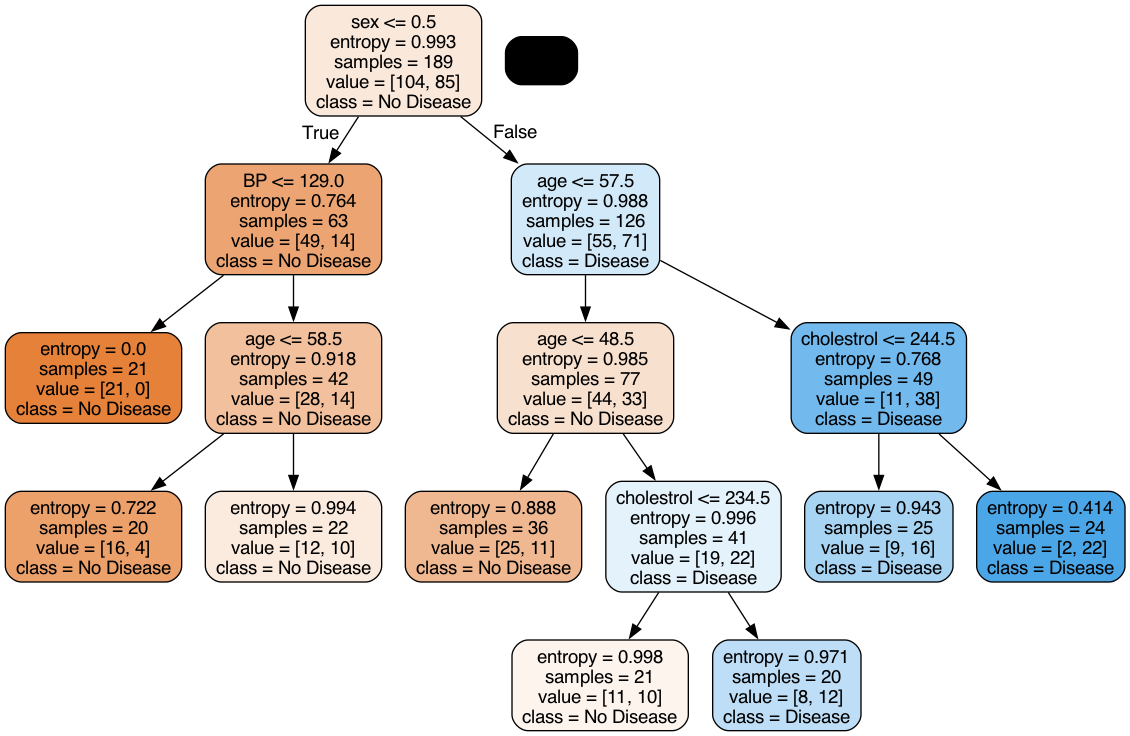

In [42]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [43]:
evaluate_model(dt_min_leaf_entropy)

0.7142857142857143
[[85 19]
 [35 50]]
--------------------------------------------------
0.6419753086419753
[[34 12]
 [17 18]]


### Hyper parameter tuninning using Grid Search

In [44]:
dt = DecisionTreeClassifier(random_state=42)

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
params = {
    'max_depth' : [2, 3, 5, 10, 20],
    'min_samples_leaf' : [5, 10, 20, 50, 100],
    'criterion': ['gini', 'entropy']
}

In [47]:
grid_search = GridSearchCV(estimator=dt,
                          param_grid=params,
                          cv=4,
                          verbose=1,
                          n_jobs=-1,
                          scoring='accuracy')

In [48]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 305 ms, sys: 260 ms, total: 564 ms
Wall time: 3.82 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [49]:
grid_search.cv_results_

{'mean_fit_time': array([0.00718123, 0.00576913, 0.00613797, 0.00671822, 0.01295549,
        0.01166487, 0.00869191, 0.00637668, 0.00632709, 0.00425422,
        0.00523323, 0.00523478, 0.004071  , 0.00479776, 0.00359923,
        0.00329447, 0.0035035 , 0.00329256, 0.00264072, 0.00286657,
        0.00254101, 0.0023647 , 0.0021888 , 0.00234306, 0.00223899,
        0.00220096, 0.00208646, 0.00317055, 0.00273573, 0.00271773,
        0.00220776, 0.00212049, 0.00226295, 0.00216281, 0.00224346,
        0.00268948, 0.0023793 , 0.0022735 , 0.00209129, 0.00192177,
        0.00240684, 0.00202948, 0.00182343, 0.00171   , 0.00169706,
        0.00180292, 0.00213403, 0.00205934, 0.00200915, 0.0017767 ]),
 'std_fit_time': array([1.30292734e-03, 3.45639580e-04, 2.49716716e-04, 1.51471905e-03,
        2.07005538e-03, 9.55782185e-04, 6.16806939e-04, 8.54480652e-04,
        9.90867120e-05, 7.62992062e-04, 1.76659188e-04, 4.32726548e-04,
        6.61826249e-04, 5.25300557e-04, 5.89600936e-04, 3.58878017e-0

In [50]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007181,0.001303,0.006182,0.002293,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.625000,0.659574,0.702128,0.574468,0.640293,0.046803,16
1,0.005769,0.000346,0.005299,0.001051,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.604167,0.659574,0.702128,0.574468,0.635084,0.049307,18
2,0.006138,0.000250,0.006085,0.001794,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.750000,0.702128,0.702128,0.574468,0.682181,0.065187,1
3,0.006718,0.001515,0.004514,0.000586,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.645833,0.638298,0.659574,0.510638,0.613586,0.059924,23
4,0.012955,0.002070,0.006925,0.000521,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.553191,0.553191,0.553191,0.550310,0.004990,41


In [51]:
cv_df.shape

(50, 15)

In [52]:
cv_df.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
2,0.006138,0.000250,0.006085,0.001794,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.75,0.702128,0.702128,0.574468,0.682181,0.065187,1
31,0.002120,0.000210,0.001409,0.000026,entropy,3,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.75,0.659574,0.702128,0.595745,0.676862,0.056715,2
7,0.006377,0.000854,0.004715,0.000266,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.75,0.702128,0.680851,0.574468,0.676862,0.064203,3
12,0.004071,0.000662,0.002561,0.000204,gini,5,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.75,0.702128,0.680851,0.574468,0.676862,0.064203,3
17,0.003293,0.000434,0.002010,0.000209,gini,10,20,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.75,0.702128,0.680851,0.574468,0.676862,0.064203,3


In [53]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=20, random_state=42)

In [54]:
grid_search.best_score_

0.6821808510638299

In [55]:
dt_best = grid_search.best_estimator_

In [56]:
evaluate_model(dt_best)

0.708994708994709
[[85 19]
 [36 49]]
--------------------------------------------------
0.6419753086419753
[[33 13]
 [16 19]]


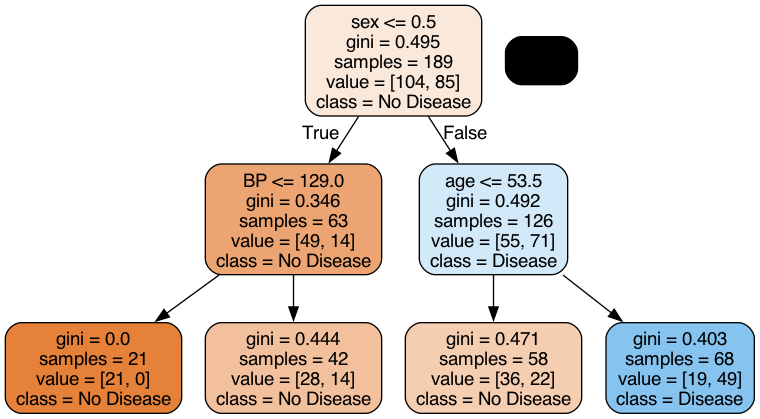

In [57]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

### Using Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  For a comparison between tree-based ensemble models see the example
 |  :ref:`sp

In [60]:
rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10)

In [61]:
X_train.head()

,age,sex,BP,cholestrol
101,67,1,120,237
177,46,1,150,231
221,65,1,135,254
253,51,1,110,175
113,54,0,135,304


In [62]:
y_train.head()

101    1
177    1
221    1
253    0
113    0
Name: heart disease, dtype: int64

In [63]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [70]:
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1914837113)]

In [71]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1608637542)

In [72]:
demo_rf = rf.estimators_[5]


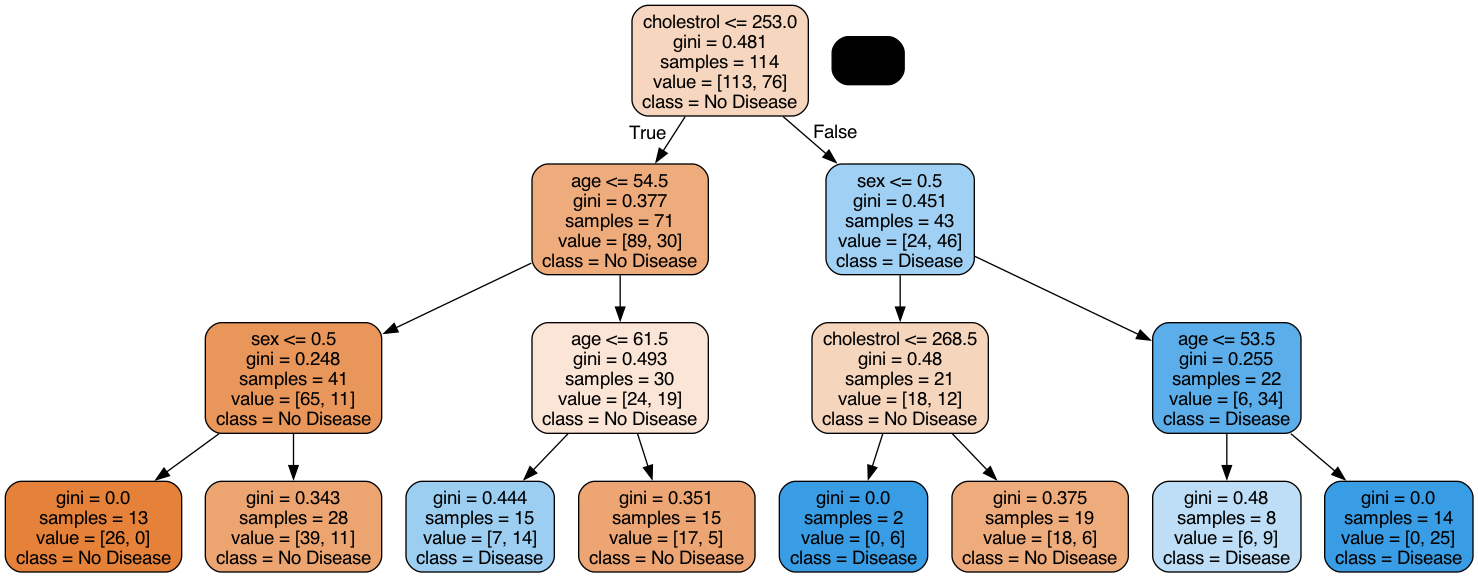

In [73]:
gph = get_dt_graph(demo_rf)
Image(gph.create_png())

### OOB Score

In [77]:
rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10, oob_score=True)

In [78]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [79]:
rf.oob_score_

0.6243386243386243

### Grid Search for hyper parameter tunning

In [84]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [91]:
params = {
    'max_depth' : [1, 2, 5, 10, 20],
    'min_samples_leaf' : [5, 10, 20, 50, 100],
    'max_features': [2, 3, 4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [92]:
grid_search = GridSearchCV(estimator=classifier_rf,
                          param_grid=params,
                          cv=4,
                          verbose=1,
                          n_jobs=-1,
                          scoring='accuracy')

In [93]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
CPU times: user 1.5 s, sys: 175 ms, total: 1.68 s
Wall time: 26.9 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [97]:
rf_best = grid_search.best_estimator_

In [98]:
evaluate_model(rf_best)

0.7248677248677249
[[85 19]
 [33 52]]
--------------------------------------------------
0.6172839506172839
[[32 14]
 [17 18]]


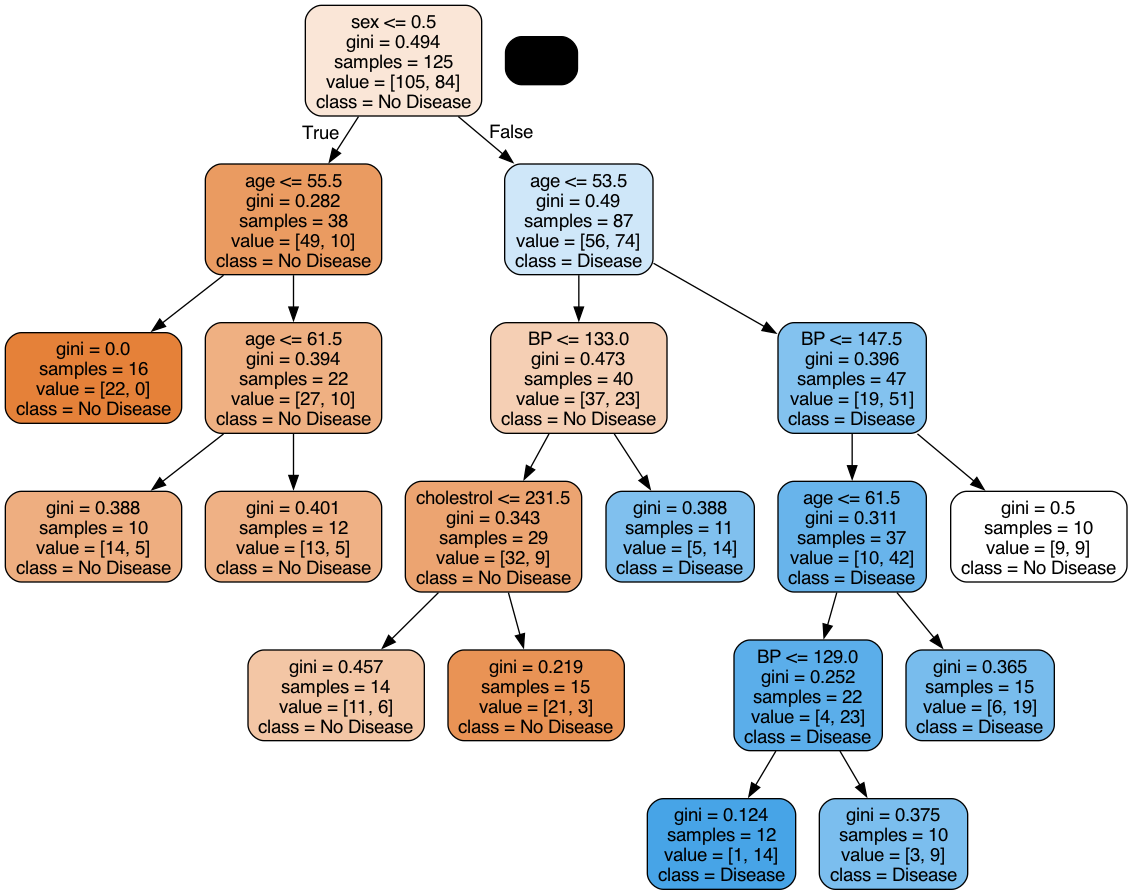

In [99]:
gph = get_dt_graph(rf_best.estimators_[0])
Image(gph.create_png())

### Variable imoprtance in Random forest and decision tree

In [100]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [101]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [102]:
classifier_rf.feature_importances_

array([0.31950439, 0.19303527, 0.21104563, 0.27641471])

In [103]:
imp_df = pd.DataFrame({
    'feature_name': X_train.columns,
    'Importance': classifier_rf.feature_importances_
})

In [104]:
imp_df.sort_values(by='Importance', ascending=False)

,feature_name,Importance
0,age,0.319504
3,cholestrol,0.276415
2,BP,0.211046
1,sex,0.193035


In [105]:
evaluate_model(classifier_rf)

0.873015873015873
[[92 12]
 [12 73]]
--------------------------------------------------
0.6296296296296297
[[32 14]
 [16 19]]
